In [101]:
import numpy as np
import pandas as pd
import pickle

#####
# import relevant bits from keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import regularizers
from keras import optimizers

from sklearn.preprocessing import StandardScaler
import keras
from matplotlib import pyplot as plt
#####
# import relevant bits from sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import seaborn as sns

from keras.models import load_model

import random

# Prepare Data

## load

In [102]:
data = pd.read_pickle('final_classification_yearly.pkl') # data_final = pd.read_pickle(folder + '/data_withInd.pkl')

## split into train and test

In [103]:
# split training into 
data['training'] = np.random.rand(data.shape[0])
training = data[data['training']>.2]
dev_test = data[data['training']<.2]
print(training.shape,dev_test.shape)

(77269, 30) (19364, 30)


## look at and balance classes in training data

In [104]:
print(data.Description.value_counts()/data.shape[0])

WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VEHICLES AND MOTORCYCLES    0.236079
MANUFACTURING                                                           0.189128
PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES                       0.167955
CONSTRUCTION                                                            0.125951
TRANSPORTATION AND STORAGE                                              0.053170
REAL ESTATE ACTIVITIES                                                  0.050821
INFORMATION AND COMMUNICATION                                           0.043991
ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES                           0.027372
ACCOMMODATION AND FOOD SERVICE ACTIVITIES                               0.021256
OTHER SERVICE ACTIVITIES                                                0.016206
ELECTRICITY,  GAS, STEAM AND AIR CONDITIONING SUPPLY                    0.015285
WATER SUPPLY, SEWERAGE, WASTE MANAGEMENT AND REMEDIATION ACTIVITIES     0.013018
ARTS, ENTERTAINMENT AND RECR

In [105]:
balanced_data = pd.DataFrame()
classes = np.unique(training['Code'])

for i in range(0,len(classes)):
    current_class = training[training['Code']==classes[i]]
    current_balance = current_class.sample(2500,replace=True)
    balanced_data = balanced_data.append(current_balance)
print(balanced_data.shape)

(40000, 30)


## now prep the training data

In [106]:
y_train = balanced_data['Code_numeric']
X_train = balanced_data.drop(['firm','Description','Code',"Code_numeric"],axis = 1)


y_train = keras.utils.to_categorical(y_train,num_classes = len(np.unique(y)))


## and the dev and test data

In [107]:
y = dev_test['Code_numeric']
X = dev_test.drop(['firm','Description','Code',"Code_numeric"],axis = 1)


ycat = keras.utils.to_categorical(y,num_classes = len(np.unique(y)))
X_dev, X_test, y_dev, y_test = train_test_split(X, ycat, test_size=0.5)


In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.fit_transform(X_dev)
X_test  = scaler.fit_transform(X_test)

/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sk

## now define a very simple neural network
Make it a sequential model.

In [109]:
model = Sequential()
reg = 0.002
drop_rate = 0.435
model.add(Dense(1000,input_dim = X_train.shape[1]))
model.add(Dropout(drop_rate, noise_shape=None, seed=None))
model.add(Activation('relu'))

model.add(Dense(500,input_dim = X_train.shape[1]))
model.add(Dropout(drop_rate, noise_shape=None, seed=None))
model.add(Activation('relu'))

model.add(Dense(500,input_dim = X_train.shape[1]))
model.add(Dropout(drop_rate, noise_shape=None, seed=None))
model.add(Activation('relu'))

model.add(Dense(500,input_dim = X_train.shape[1]))
model.add(Dropout(drop_rate, noise_shape=None, seed=None))
model.add(Activation('relu'))

model.add(Dense(500,input_dim = X_train.shape[1]))
model.add(Dropout(drop_rate, noise_shape=None, seed=None))
model.add(Activation('relu'))

model.add(Dense(y_train.shape[1],activation = 'softmax'))
adam = optimizers.Adam(decay = 1e-6)
# For a multi-class classification problem
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# experiment with different optimizersc
evals = model.fit(X_train,y_train,validation_data = (X_dev,y_dev),
          epochs = 100,batch_size = 512,verbose = 1)

model.save('adam_1e6decay_435do_balanced.h5')
with open('history_balanced', 'wb') as file:
        pickle.dump(evals.history, file)

Train on 40000 samples, validate on 9682 samples
Epoch 1/100
40000/40000 [==============================] - 7s 178us/step - loss: 2.7584 - acc: 0.0798 - val_loss: 2.7744 - val_acc: 0.0258
Epoch 2/100
40000/40000 [==============================] - 8s 210us/step - loss: 2.7197 - acc: 0.1071 - val_loss: 2.7667 - val_acc: 0.0380
Epoch 3/100
40000/40000 [==============================] - 8s 200us/step - loss: 2.6851 - acc: 0.1248 - val_loss: 2.7597 - val_acc: 0.0352
Epoch 4/100
40000/40000 [==============================] - 8s 196us/step - loss: 2.6508 - acc: 0.1417 - val_loss: 2.7131 - val_acc: 0.0533
Epoch 5/100
40000/40000 [==============================] - 6s 162us/step - loss: 2.6132 - acc: 0.1577 - val_loss: 2.7403 - val_acc: 0.0524
Epoch 6/100
40000/40000 [==============================] - 9s 230us/step - loss: 2.5734 - acc: 0.1725 - val_loss: 2.7155 - val_acc: 0.0618
Epoch 7/100
40000/40000 [==============================] - 8s 201us/step - loss: 2.5384 - acc: 0.1881 - val_loss: 2.7

In [15]:
with open('history', 'wb') as file:
        pickle.dump(evals.history, file)

## get our training curves here


In [20]:
model = load_model('adam_1e6decay_435do_balanced.h5')
'''evals = pd.read_pickle('history')
print(evals)'''

{'val_loss': [2.2134719873895707], 'val_acc': [0.2463783115543277], 'loss': [2.247417807045493], 'acc': [0.22853336087069628]}


## make our predicts

In [112]:
preds = model.predict(X_test)
preds_numeric = np.argmax(preds,axis = 1)

y_test_numeric = np.argmax(y_test,axis=1)

In [113]:
precision_recall_fscore_support(preds_numeric,y_test_numeric,average='macro')

(0.22644313311473102, 0.1498282790216374, 0.13624197721128206, None)

Text(0.5, 114.0, 'Predicted')

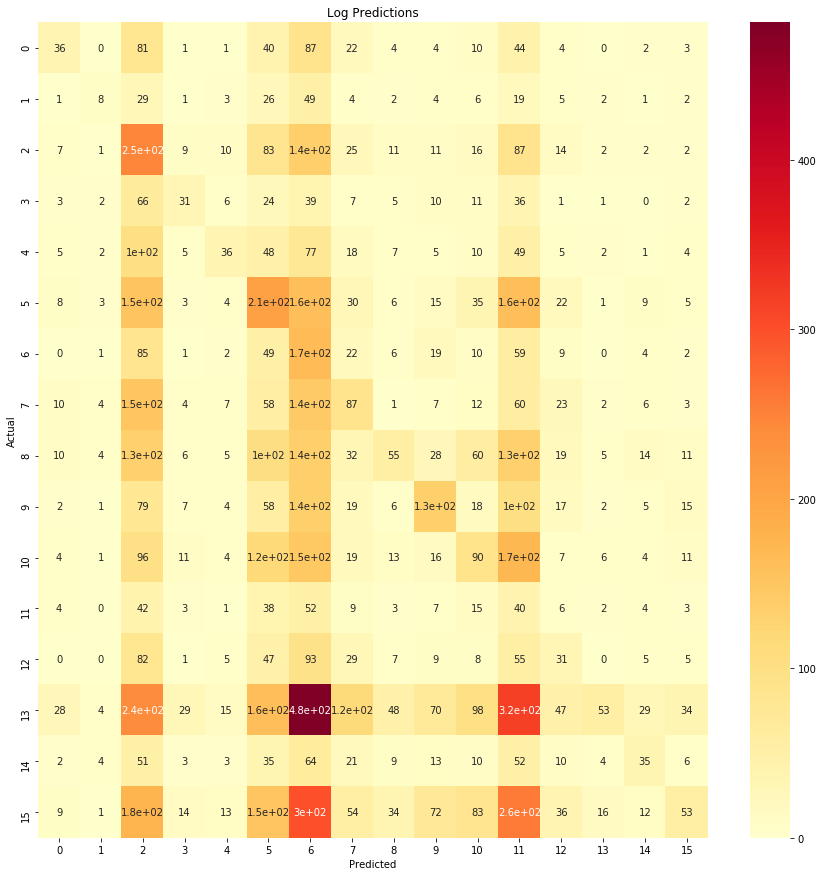

In [114]:
# confusion matrix
matrix = confusion_matrix(preds_numeric, y_test_numeric) 
plt.figure(figsize=(15,15))
ax0 = plt.subplot()
sns.heatmap(matrix,vmin = np.min(matrix),vmax = np.max(matrix),cmap = 'YlOrRd',annot=True)
ax0.set_title("Log Predictions");ax0.set_ylabel("Actual");ax0.set_xlabel('Predicted')


In [ ]:
# compute precision and recall
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix